In [55]:
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def hz_mel(freqs):
  return 2595 * np.log10(1+ freqs/700)

def mel_hz(mels):
  return 700 * (10**(mels / 2595) - 1)

In [57]:
def filtos_de_mel(n_filtros,tam_freq,tam_bandas, fmin, fmax):
  #limites de mel
  mel_min = hz_mel(fmin)
  mel_max = hz_mel(fmax)

  #puntos de mel y convertirlos a Hz
  puntos_mel = np.linspace(mel_min,mel_max, n_filtros+2)
  puntos_en_hz = mel_hz(puntos_mel)

  #frecuencias centrales
  fC = np.floor((tam_bandas + 1)* puntos_en_hz/tam_freq).astype(int)

  banco_filtros = np.zeros((n_filtros,tam_bandas // 2 + 1))
  for m in range(1, n_filtros + 1):
    for k in range(tam_bandas // 2 + 1):
      if k < fC[m - 1]:
        banco_filtros[m - 1, k] = 0
      elif fC[m - 1] <= k < fC[m]:
        banco_filtros[m - 1, k] = (k - fC[m - 1]) / (fC[m] - fC[m - 1])
      elif fC[m] <= k < fC[m + 1]:
        banco_filtros[m - 1, k] = (fC[m + 1] - k) / (fC[m + 1] - fC[m])
      else:
        banco_filtros[m - 1, k] = 0
  return banco_filtros

In [68]:
num_filtros = 10  # Número de filtros de Mel
tamano_frecuencia = 20000  # Frecuencia de muestreo en Hz
tam_bandas = 512  # Tamaño bandas
fmin = 20
fmax = 4000

In [69]:
mel_filtros = filtos_de_mel(num_filtros, tamano_frecuencia, tam_bandas,fmin, fmax)

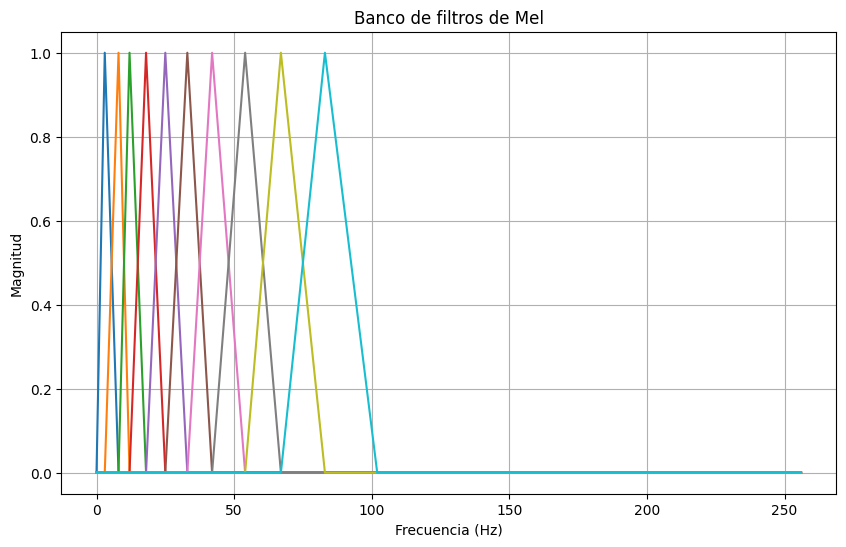

In [70]:
plt.figure(figsize=(10, 6))
for i in range(num_filtros):
    plt.plot(mel_filtros[i])
plt.title('Banco de filtros de Mel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()